# Figure 1
### Sequence length distributions in SwissProt and SwissProt restricted by 95% identity to SCOP2 superfamily representatives

### SCOP2 superfamily database
Download the SCOP2 superfamily representative sequences into the `data/` directory.

```
cd data
wget https://scop.mrc-lmb.cam.ac.uk/files/scop_sf_represeq_lib_latest.fa
```

For convenience, rename the file.

```
mv scop_sf_represeq_lib_latest.fa scop.fa
```

### Swiss-Prot
Download and unzip Swiss-Prot.

```
wget https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.fasta.gz
gzip -d uniprot_sprot.fasta.gz
```

Filter Swiss-Prot for sequences with lengths between 50 and 2000 and write to `data/sprot.fa`.

```
```

### BLAST alignment
Construct a BLAST database from the SCOP2 superfamily representatives. First create a subdirectory `data/scopdb` to contain the files, then run `makeblastdb` to generate the database. 

```
mkdir scopdb
makeblastdb -in scop.fa -out scopdb/scop -dbtype prot -title scop
```

Align Swiss-Prot against the SCOP2 superfamily representative sequences. Set `num_threads` for your system.

(On my Latitude 5040, the BLAST search completes in about six hours.)

```
cd ..
mkdir outputs
blastp -query data/sprot.fa -db data/scopdb/scopsf -word_size 4 -outfmt "6 qstart qend sstart send pctid" -num_threads 12 > outputs/sprot_scopsf.out
```

Parse sequence IDs from the output table and register each sequence in Swiss-Prot to a superfamily representative sequence in SCOP2.

```
```

Classify each sequence in Swiss-Prot according to its superfamily's fold. 

```
```

# Figure 2
## Methods
* BLAST
* EASEL
    * installation
* disjointpermutation.jl

### a) Generate Swiss-Prot variants
- random: find a permutation $\rho$ of sprot so that sequence $i$ and sequence $\rho(i)$ are from different SCOP2 superfamilies
- shuf$_{\text{all}}$, shuf: 
- rev$_{\text{all}}$, rev: 
- shufrev$_{\text{all}}$, shufrev: esl-shuffle

### b) Run paired Swiss-Prot alignments
- using BLAST for pairwise alignment

# Figure 3
## Methods
* BLAST
* tantan
    * installation
* mask.jl

### a) Generate soft masks with tantan

### b) Run hard-masked paired alignments

# Figure 4
## Methods
* BioAlignments
* Score matrix distributions
    * parsing
    * talk to Jack
* Sequence mutation (BLOSUM.jl)
* Wilcoxon (wilcoxon.jl)

### a) Generate BLOSUM90 variants
### b) Generate mutations of Swiss-Prot variants
### c) Run paired alignments

# Figure 5
## Methods
* manacher.jl
* BioAlignments
    * Configuration for exact alignment

### a) Splice repetitive regions from Swiss-Prot using tantan masks
### b) Run exact paired alignments and Manacher's algorithm

# Figure 6
### Exact and approximate palindromes in DNA 

### Human Chromosome 22
Retrieve chromosome 22 on NCBI Nucleotide.
- <a href="https://www.ncbi.nlm.nih.gov/nuccore/NC_000022?report=fasta">GRCh38.p14 Primary Assembly /  NC_000022.11</a>

Download the sequence file in FASTA format using the `Send to` dropdown menu.
<img src="assets/ncbinucleotidesendto.png"/>

### Chromosome Annotations
Retrieve annotations for chromosome 22 e.g., using the NCBI Gene queries from <a href="https://en.wikipedia.org/wiki/Chromosome_22#cite_note-NCBI_coding-9">Wikipedia</a>.
- <a href="https://www.ncbi.nlm.nih.gov/gene?term=22%5BCHR%5D%20AND%20%22Homo%20sapiens%22%5BOrganism%5D%20AND%20%28%22genetype%20protein%20coding%22%5BProperties%5D%20AND%20alive%5Bprop%5D%29&cmd=DetailsSearch"> Protein-coding gene annotations </a>
- <a href="https://www.ncbi.nlm.nih.gov/gene?term=22%5BCHR%5D%20AND%20%22Homo%20sapiens%22%5BOrganism%5D%20AND%20%28%28%22genetype%20miscrna%22%5BProperties%5D%20OR%20%22genetype%20ncrna%22%5BProperties%5D%20OR%20%22genetype%20rrna%22%5BProperties%5D%20OR%20%22genetype%20trna%22%5BProperties%5D%20OR%20%22genetype%20scrna%22%5BProperties%5D%20OR%20%22genetype%20snrna%22%5BProperties%5D%20OR%20%22genetype%20snorna%22%5BProperties%5D%29%20NOT%20%22genetype%20protein%20coding%22%5BProperties%5D%20AND%20alive%5Bprop%5D%29&cmd=DetailsSearch"> Noncoding RNA annotations </a>
- <a href="https://www.ncbi.nlm.nih.gov/gene?term=22%5BCHR%5D%20AND%20%22Homo%20sapiens%22%5BOrganism%5D%20AND%20%28%22genetype%20pseudo%22%5BProperties%5D%20AND%20alive%5Bprop%5D%29&cmd=DetailsSearch"> Pseudogene annotations </a>
    
Download each annotation file in tabular text format using the `Send to` dropdown menu.
<img src="assets/ncbigenesendto.png"/>

### Distribution of LPS in chromosome 22
Using the `lps` flag, generate the distribution of maximal palindromes in protein-coding, noncoding RNA, and pseudogene regions of chromosome 22.
```
julia -t 12 fig6.jl data/ncbi_chr22_sequence.fasta data/ncbi_chr22_protein.txt outputs/fig6_chr22palindromes_protein.dlm lps
```
```
julia -t 12 fig6.jl data/ncbi_chr22_sequence.fasta data/ncbi_chr22_pseudo.txt outputs/fig6_chr22palindromes_pseudo.dlm lps
```
```
julia -t 12 fig6.jl data/ncbi_chr22_sequence.fasta data/ncbi_chr22_rna.txt outputs/fig6_chr22palindromes_rna.dlm lps
```

For a control, rerun each job with the `shuffle` keyword to shuffle each region before the LPS is calculated.
```
julia -t 12 fig6.jl data/ncbi_chr22_sequence.fasta data/ncbi_chr22_protein.txt outputs/fig6_shuffledchr22palindromes_protein.dlm lps shuffle
```
```
julia -t 12 fig6.jl data/ncbi_chr22_sequence.fasta data/ncbi_chr22_pseudo.txt outputs/fig6_shuffledchr22palindromes_pseudo.dlm lps shuffle
```
```
julia -t 12 fig6.jl data/ncbi_chr22_sequence.fasta data/ncbi_chr22_rna.txt outputs/fig6_shuffledchr22palindromes_rna.dlm lps shuffle
```


### Plot

In [2]:
using Plots
using DataFrames
using DelimitedFiles

In [42]:
chr22palindromes_protein = readdlm("outputs/fig6_chr22palindromes_protein.dlm", Int)
chr22palindromes_pseudo = readdlm("outputs/fig6_chr22palindromes_pseudo.dlm", Int)
chr22palindromes_rna = readdlm("outputs/fig6_chr22palindromes_rna.dlm", Int)
shuffledchr22palindromes_protein = readdlm("outputs/fig6_shuffledchr22palindromes_protein.dlm", Int)
shuffledchr22palindromes_pseudo = readdlm("outputs/fig6_shuffledchr22palindromes_pseudo.dlm", Int)
shuffledchr22palindromes_rna = readdlm("outputs/fig6_shuffledchr22palindromes_rna.dlm", Int);

In [43]:
seqlengths_and_palindromes = [
    chr22palindromes_protein, 
    chr22palindromes_pseudo, 
    chr22palindromes_rna, 
    shuffledchr22palindromes_protein, 
    shuffledchr22palindromes_pseudo, 
    shuffledchr22palindromes_rna]
labels = [
    "protein-coding genes",
    "pseudogenes",
    "non-coding rna",
    "shuffled protein-coding genes",
    "shuffled pseudogenes",
    "shuffled non-coding rna"];

In [44]:
include("source/utils.jl")
function plot_distribution_table!(distribution::Matrix{Int}, label)
    seq_lengths, lps_lengths = unzip(Tuple.(eachrow(distribution)))
    scatter!(seq_lengths, lps_lengths, label=label)
end;

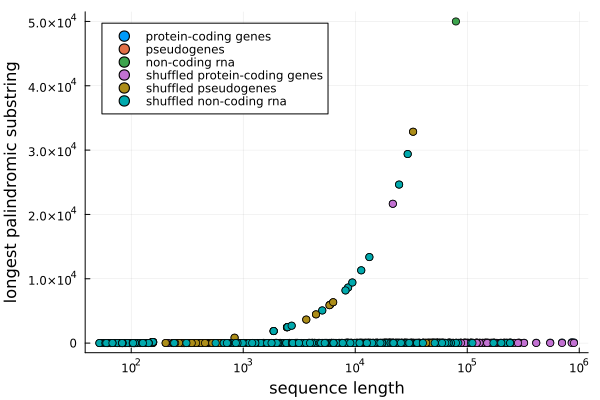

In [47]:
plot(ylabel="longest palindromic substring", 
     xlabel="sequence length",
     xscale=:log,
     legend=:topleft)
subset = 1:6
plot_distribution_table!.(seqlengths_and_palindromes[subset], labels[subset])
savefig("figures/fig6_chr22palindromes.png")
plot!()

# Figure 7
### Distribution of LPS in tryptic peptides of Swiss-Prot

### Generate LPS distributions of tryptic peptides
Generate LPS distributions of tryptic peptides between lengths `5` and `50` in `data/sprot.fa` and `data/shuf.fa` and write them to `outputs/fig7_shuffledtrypticpalindromes_sprot.dlm` and `outputs/fig7_shuffledtrypticpalindromes_shuf.dlm`.
```
julia -t 12 fig7.jl data/sprot.fa outputs/fig7_trypticpalindromes_sprot.dlm 5 50
```
```
julia -t 12 fig7.jl data/shuf.fa outputs/fig7_trypticpalindromes_shuf.dlm 5 50
```

Also generate the LPS distribution for shuffled tryptic peptides in `data\sprot.fa`. The keyword `shuffle` shuffles each tryptic peptide before it is passed to the LPS algorithm; this allows us to compare palindromicity as a result of low-complexity tryptic peptides (e.g., dipeptide repeats are always palindromic) against palindromicity as a result of patterns that are not permutation invariant.
```
julia -t 12 fig7.jl data/sprot.fa outputs/fig7_shuffledtrypticpalindromes_sprot.dlm 5 50 shuffle
```

### Plot

In [20]:
using Plots
using DataFrames
using DelimitedFiles
using StatsBase

In [21]:
minlength = 7
maxlength = 50
sprotdist = readdlm("outputs/fig7_trypticpalindromes_sprot.dlm", Int)
sprotshufdist = readdlm("outputs/fig7_shuffledtrypticpalindromes_sprot.dlm", Int)
shufdist = readdlm("outputs/fig7_trypticpalindromes_shuf.dlm", Int);

In [45]:
function plot_distribution_matrix!(distribution::Matrix{Int}, label)
    global minlength, maxlength
    @assert maxlength == size(distribution)[1]
    distribution = maxlength .* distribution ./ sum(distribution)
    # calculate mean length palindrome for each sequence length
    avg_pal = [sum(collect(1:maxlength) .* distribution[seq, :]) for seq=minlength:maxlength]
    plot!(avg_pal, label=label)
end;

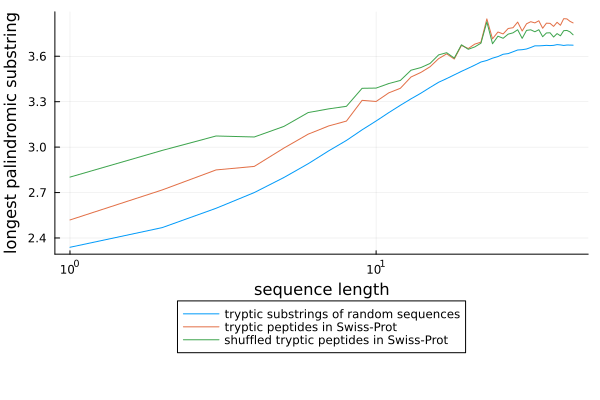

In [27]:
plot(ylabel="longest palindromic substring", 
     xlabel="sequence length",
     xscale=:log,
     legend=:outerbottom)
plot_distribution_matrix!(shufdist, "tryptic substrings of random sequences")
plot_distribution_matrix!(sprotdist, "tryptic peptides in Swiss-Prot")
plot_distribution_matrix!(sprotshufdist, "shuffled tryptic peptides in Swiss-Prot")
savefig("figures/fig7_trypticpeptides.png")
plot!()

In [46]:
function plot_difference!(dist_A::Matrix{Int}, dist_B::Matrix{Int}, label)
    global minlength, maxlength
    @assert maxlength == size(dist_A)[1] == size(dist_B)[1]
    dist_A = maxlength .* dist_A ./ sum(dist_A)
    dist_B = maxlength .* dist_B ./ sum(dist_B)
    avg_pal_A =  [sum(collect(1:maxlength) .* dist_A[seq, :]) for seq=minlength:maxlength]
    avg_pal_B =  [sum(collect(1:maxlength) .* dist_B[seq, :]) for seq=minlength:maxlength]
    plot!([0 for _=minlength:maxlength], color="black", width=0.8, label=false)
    plot!(avg_pal_A .- avg_pal_B, label=label)
end;

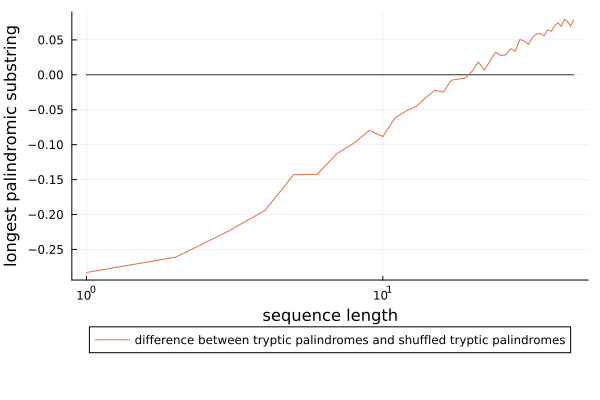

In [26]:
plot(ylabel="longest palindromic substring", 
     xlabel="sequence length",
     xscale=:log,
     legend=:outerbottom)
plot_difference!(sprotdist, sprotshufdist, "difference between tryptic palindromes and shuffled tryptic palindromes")
savefig("figures/fig7_reverseaffinity.png")
plot!()